## OrderedDict

* subclass of dict 
* preserves the order in which keys are inserted
* order now worked in normal dict in python 3.7
* OrderedDict provides additional features


In [1]:
from collections import OrderedDict
from icecream import ic
ic.configureOutput(prefix='', outputFunction=print)
print = ic

#### 1. Creating OrderedDict

In [2]:
od = OrderedDict()
od['a'] = 1
od['b'] = 2
od['c'] = 3

print(od)

od: OrderedDict({'a': 1, 'b': 2, 'c': 3})


OrderedDict([('a', 1), ('b', 2), ('c', 3)])

#### 2. Features

In [3]:
# Maintains Insertion Order
od = OrderedDict()
od['first'] = 1
od['second'] = 2
od['third'] = 3
print(od) 

# Re-inserting a Key
od = OrderedDict({'a': 1, 'b': 2, 'c': 3})
od['b'] = 42  # Re-inserting 'b'
print(od) # Output: OrderedDict([('a', 1), ('c', 3), ('b', 42)])

od: OrderedDict({'first': 1, 'second': 2, 'third': 3})
od: OrderedDict({'a': 1, 'b': 42, 'c': 3})


OrderedDict([('a', 1), ('b', 42), ('c', 3)])

#### 3. Methods

In [4]:
od = OrderedDict({'a': 1, 'b': 2, 'c': 3})
od.move_to_end('b') # Move 'b' to the end (default behavior)
print(od)

od.move_to_end('c', last=False) # Move 'c' to the beginning
print(od)  # Output: OrderedDict([('c', 3), ('a', 1), ('b', 2)])

od = OrderedDict({'a': 1, 'b': 2, 'c': 3})

item = od.popitem() # Remove and return the last item
print(item)  # Output: ('c', 3)
print(od)    # Output: OrderedDict([('a', 1), ('b', 2)])

item = od.popitem(last=False) # Remove and return the first item
print(item)  # Output: ('a', 1)
print(od)  

# Equality

od1 = OrderedDict({'a': 1, 'b': 2})
od2 = OrderedDict({'b': 2, 'a': 1})

print(od1 == od2) # Output: False (order matters)

od: OrderedDict({'a': 1, 'c': 3, 'b': 2})
od: OrderedDict({'c': 3, 'a': 1, 'b': 2})
item: ('c', 3)
od: OrderedDict({'a': 1, 'b': 2})
item: ('a', 1)
od: OrderedDict({'b': 2})
od1 == od2: False


False

#### 4. Usecases

##### LRU cache

In [7]:
class LRUCahe:
    def __init__(self,capacity:int):
        self.cache = OrderedDict()
        self.capacity = capacity

    def get(self, key:int)->int:
        if key not in self.cache:
            return -1
        else:
            self.cache.move_to_end(key)
            return self.cache[key]
        
    def put(self, key:str, value:int)->None:
        if key in self.cache:
            self.cache.move_to_end(key)

        self.cache[key]= value
        if len(self.cache) > self.capacity:
            self.cache.popitem(last=False)

cache = LRUCahe(2)
cache.put('a',1)
cache.put('b',2)
print(cache.get('a'))
cache.put('c',3)
print(cache.get('b'))


cache.get('a'): 1
cache.get('b'): -1


-1

##### JSON Seriealization
Maintain key order when serializing a dictionary to JSON.

In [8]:
import json
od = OrderedDict({'name': 'Alice', 'age': 30, 'city': 'New York'})
json_str = json.dumps(od)
print(json_str)

json_str: '{"name": "Alice", "age": 30, "city": "New York"}'


'{"name": "Alice", "age": 30, "city": "New York"}'

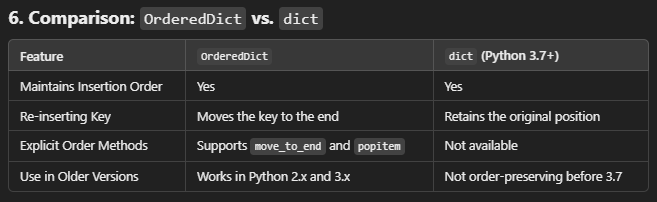